<a href="https://colab.research.google.com/github/rhehgus02/ESAA_OB/blob/main/%EB%AF%B8%EB%8B%88%ED%94%84%EB%A1%9C%EC%A0%9D%ED%8A%B81_%EC%84%A0%ED%98%95%ED%9A%8C%EA%B7%80%2C_%EC%97%98%EB%9D%BC%EC%8A%A4%ED%8B%B1%EB%84%B7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# matplotlib 한글 깨짐방지
# 아래코드 실행후 '런타임 다시시작' 후 모듈 불러오기

!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 18 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 2s (6,812 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 120895 files and dire

# **1. 데이터 확인**

## **1-1. 데이터 불러오기**

In [2]:
## Import Libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import os
import warnings
warnings.filterwarnings('ignore')

In [3]:
plt.rc('font', family='NanumBarunGothic') #matplotlib 한글 깨짐 방지

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/ESAA/OB/미니프로젝트1/insurance.csv')

### **📌 데이터 설명**
- 환자들의 치료 비용에 관한 데이터셋
- 치료 비용은 진단, 클리닉 유형, 거주 도시, 나이 등 여러 요인에 따라 달라짐
  - 환자의 건강 상태에 대한 결론을 내릴 수 있는 여러 정보들을 포함하고 있음

## **1-2. 데이터 구조 파악**
- 데이터의 전반적인 구조 파악

In [6]:
# 상위 5개의 데이터 확인

data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [7]:
# 데이터 정보 확인

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


- 데이터에 결측치는 없음
- 대부분 자료들에 대한 데이터형이 잘 정의되어 있음
- 회귀 모델링 시 필요한 변수
  - target: charges
  - feature: age, sex, bmi, children, smoker, region
- 일부 범주형 변수를 포함하고 있음
  - sex, smoker, region

## **1-3. 데이터 분리(train  vs test)**

In [8]:
from sklearn.model_selection import train_test_split

train_df, test_df = train_test_split(data, test_size = 0.2, random_state = 42, shuffle = True)

In [9]:
train_df.shape

(1070, 7)

In [10]:
test_df.shape

(268, 7)

# **2. EDA(Explanatory Data Analysis)**
- 모델을 학습시키기 전에 데이터를 더 잘 이해하고 모델을 준비하는 과정
  - 데이터의 특성, 분포, 이상치, 상관 관계 등을 조사하고 모델을 개발하기 위한 통찰을 얻는 과정
- **train** 데이터에 대해서만 수행
  - **test** 데이터를 EDA에 사용하는 것은 Data Leakage 문제를 발생

In [11]:
train_df.head()

,age,sex,bmi,children,smoker,region,charges
560,46,female,19.95,2,no,northwest,9193.83850
1285,47,female,24.32,0,no,northeast,8534.67180
1142,52,female,24.86,0,no,southeast,27117.99378
969,39,female,34.32,5,no,southeast,8596.82780
486,54,female,21.47,3,no,northwest,12475.35130


In [12]:
# 요약통계량 확인

train_df.describe()

,age,bmi,children,charges
count,1070.000000,1070.000000,1070.000000,1070.000000
mean,39.357009,30.560397,1.107477,13346.089736
std,14.073960,6.043386,1.215983,12019.510778
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.205000,0.000000,4897.667387
50%,39.500000,30.210000,1.000000,9575.442100
75%,51.000000,34.496250,2.000000,16746.657400
max,64.000000,53.130000,5.000000,62592.873090


- 각 feature 변수의 분포가 대체로 정규분포를 따르는 것으로 보임
  - 반면, target 변수의 분포는 약간 왜곡된 것으로 보임
- 극단적인 이상치는 존재하지 않는 것으로 판단됨

## **2-1. Feature 변수**

### **2-1-1. 나이(age)**

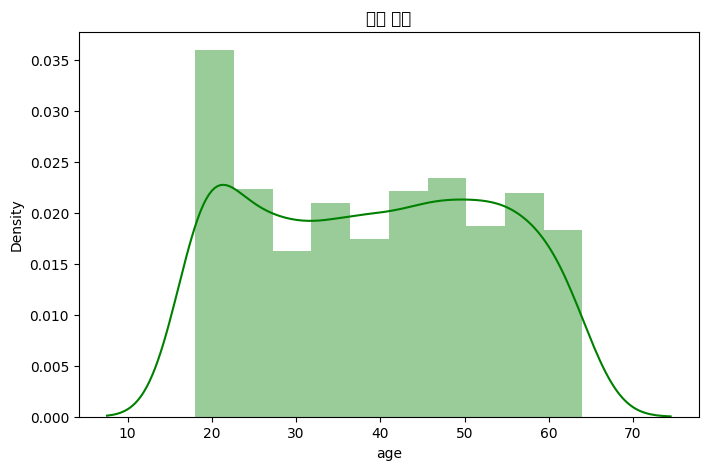

In [13]:
## 분포 시각화

plt.figure(figsize = (8,5))
plt.title("나이 분포")
ax = sns.distplot(train_df["age"], color = 'g')

- 나이대가 고르게 분포하고 있음을 확인할 수 있다.

<Figure size 800x500 with 0 Axes>

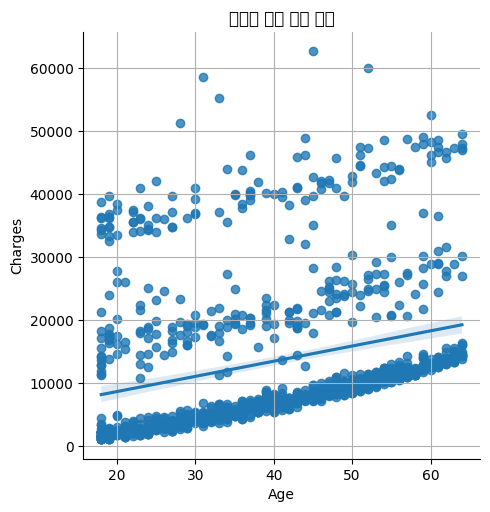

In [14]:
## 나이와 치료 비용의 관계
# lmplot으로 시각화

plt.figure(figsize = (8, 5))
sns.lmplot(data = train_df, x = 'age', y = 'charges')
plt.xlabel('Age')
plt.ylabel('Charges')
plt.title('나이에 따른 치료 비용')
plt.grid(True)
plt.show()

- 나이와 치료 비용은 양의 상관관계를 가짐을 짐작할 수 있다.

### **2-1-2. 성별(Sex)**

In [15]:
## 성별 분포 확인

train_df['sex'].value_counts()

male      548
female    522
Name: sex, dtype: int64

- 남녀의 수가 비슷함

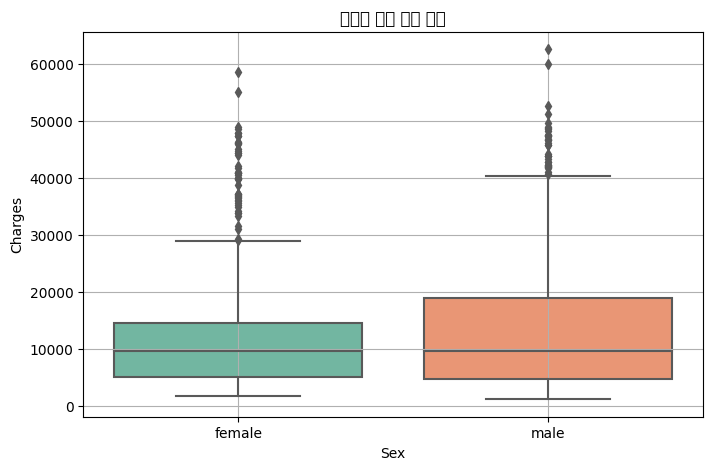

In [16]:
## 성별에 따른 치료 비용 분포
# boxplot으로 시각화

plt.figure(figsize = (8, 5))
sns.boxplot(x = 'sex', y = 'charges', data = train_df, palette = 'Set2')
plt.xlabel('Sex')
plt.ylabel('Charges')
plt.title('성별에 따른 치료 비용')
plt.grid(True)
plt.show()

- 성별에 따라 치료 비용은 꽤나 차이가 나는 것을 확인할 수 있음
- 두 성별 모두 치료 비용에 이상치가 존재함을 확인할 수 있음

### **2-1-3. 체질량지수(bmi)**

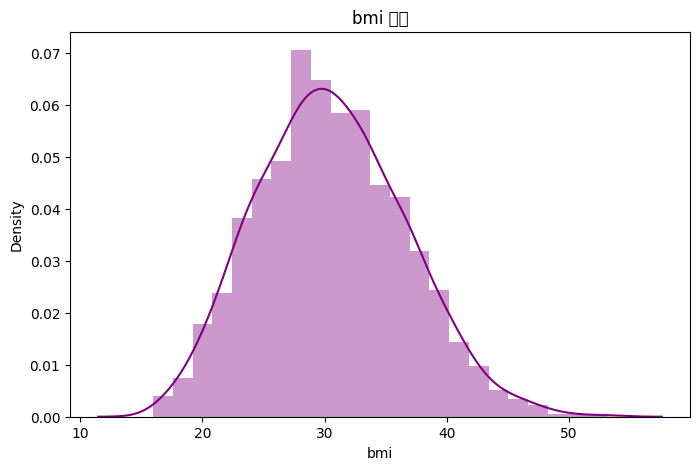

In [17]:
## 분포 시각화

plt.figure(figsize = (8,5))
plt.title("bmi 분포")
ax = sns.distplot(train_df["bmi"], color = 'purple')

- 정규분포에 가까운 분포를 지니고 있음

<Figure size 800x500 with 0 Axes>

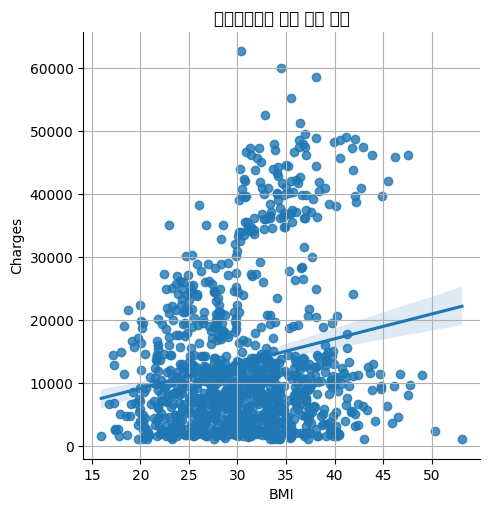

In [18]:
## 나이와 치료 비용의 관계
# lmplot으로 시각화

plt.figure(figsize = (8, 5))
sns.lmplot(data = train_df, x = 'bmi', y = 'charges')
plt.xlabel('BMI')
plt.ylabel('Charges')
plt.title('체질량지수에 따른 치료 비용')
plt.grid(True)
plt.show()

- 체질량지수는 치료 비용과 약한 양의 상관관계를 지님

### **2-1-4. 자녀 수(children)**

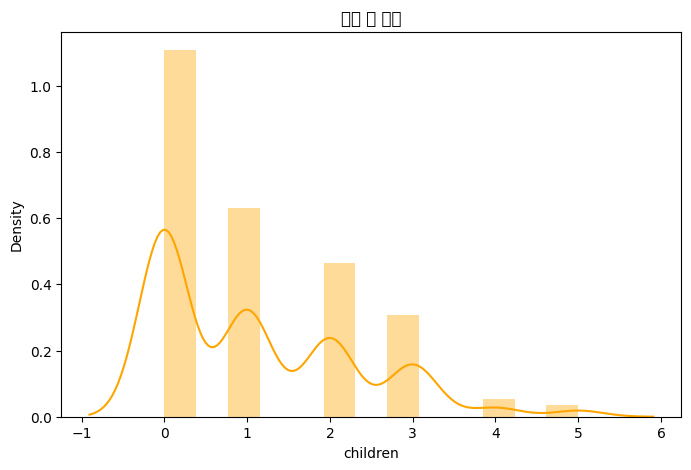

In [19]:
## 분포 시각화

plt.figure(figsize = (8,5))
plt.title("자녀 수 분포")
ax = sns.distplot(train_df["children"], color = 'orange')

- 대부분 3명 이하임

<Figure size 800x500 with 0 Axes>

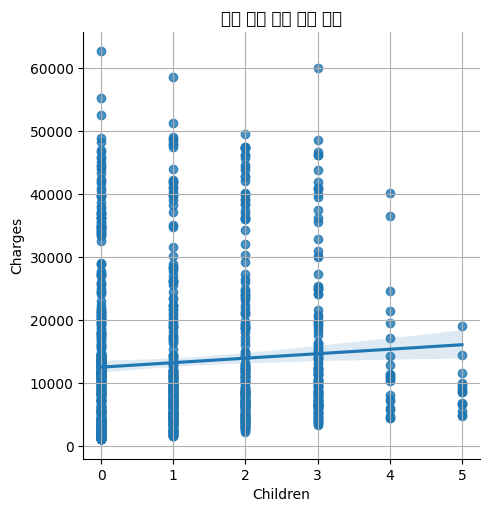

In [20]:
## 자녀 수와 치료 비용의 관계
# lmplot으로 시각화

plt.figure(figsize = (8, 5))
sns.lmplot(data = train_df, x = 'children', y = 'charges')
plt.xlabel('Children')
plt.ylabel('Charges')
plt.title('자녀 수에 따른 치료 비용')
plt.grid(True)
plt.show()

- 뚜렷한 상관관계가 있다고 보기엔 어려움

### **2-1-5. 흡연 여부(smoker)**

In [21]:
## 흡연 여부 분포 확인

train_df['smoker'].value_counts()

no     850
yes    220
Name: smoker, dtype: int64

- 비흡연자가 흡연자에 비해 압도적으로 비율이 높음

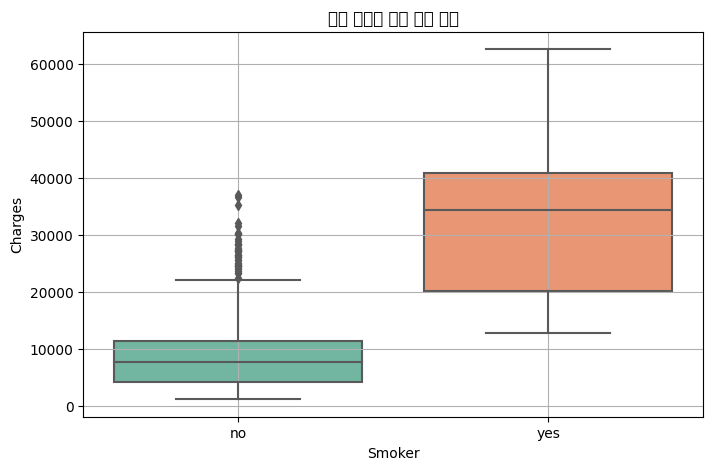

In [22]:
## 흡연 여부에 따른 치료 비용 분포
# boxplot으로 시각화

plt.figure(figsize = (8, 5))
sns.boxplot(x = 'smoker', y = 'charges', data = train_df, palette = 'Set2')
plt.xlabel('Smoker')
plt.ylabel('Charges')
plt.title('흡연 여부에 따른 치료 비용')
plt.grid(True)
plt.show()

- 흡연자에 비해 비흡연자의 치료 비용이 확실히 낮음을 확인할 수 있음
- 비흡연자의 경우 치료 비용에 일부 이상치가 존재함을 확인할 수 있음

### **2-1-6. 지역(region)**

In [23]:
## 지역 분포 확인

train_df['region'].value_counts()

southeast    283
northeast    267
southwest    264
northwest    256
Name: region, dtype: int64

- 각 지역에 사람들이 고르게 분포하고 있음

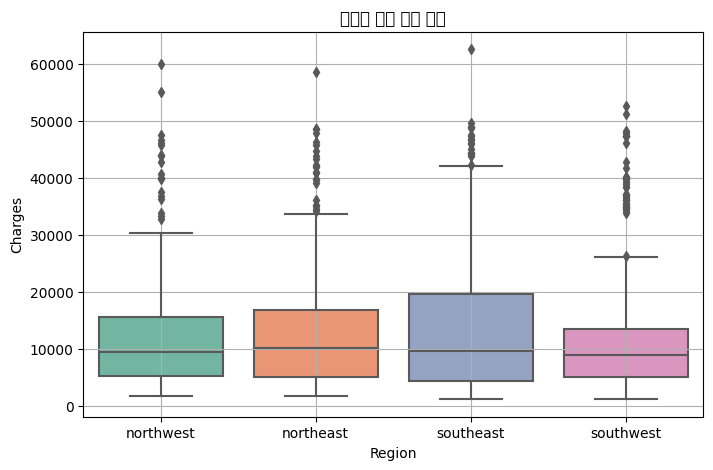

In [24]:
## 지역에 따른 치료 비용 분포
# boxplot으로 시각화

plt.figure(figsize = (8, 5))
sns.boxplot(x = 'region', y = 'charges', data = train_df, palette = 'Set2')
plt.xlabel('Region')
plt.ylabel('Charges')
plt.title('지역에 따른 치료 비용')
plt.grid(True)
plt.show()

- 지역에 따른 치료 비용의 평균값은 그닥 차이가 없는 것으로 보임
- southeast 지역의 치료 비용이 다른 지역에 비해 살짝 높은 경향을 보임

## **2-2. Target 변수(charges)**

### **(a) 분포 파악하기**

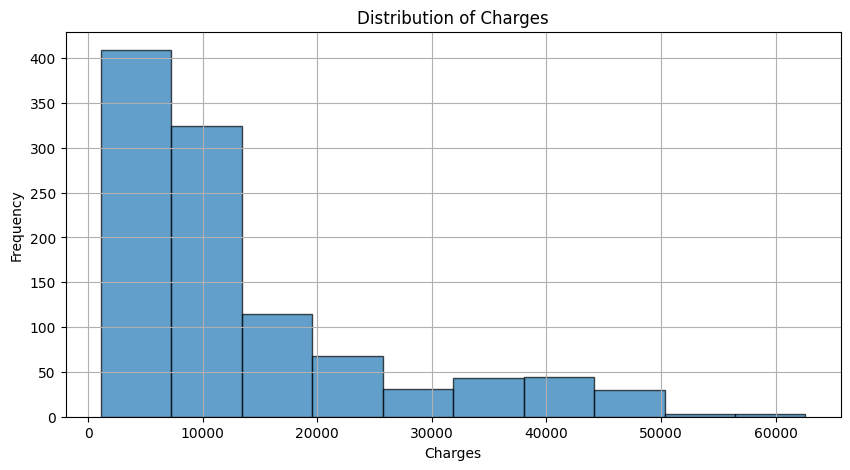

In [25]:
## 분포 시각화
# charges 변수를 히스토그램으로 시각화

plt.figure(figsize = (10, 5))
plt.hist(train_df['charges'], bins = 10, edgecolor = 'black', alpha=0.7)
plt.xlabel('Charges')
plt.ylabel('Frequency')
plt.title('Distribution of Charges')
plt.grid(True)
plt.show()

In [26]:
# 왜도 확인

train_df['charges'].skew()

1.5154267353397535

- 왜도가 1 이상으로 다소 왜곡된 분포를 가지고 있음을 확인할 수 있음

### **(b) pairplot**

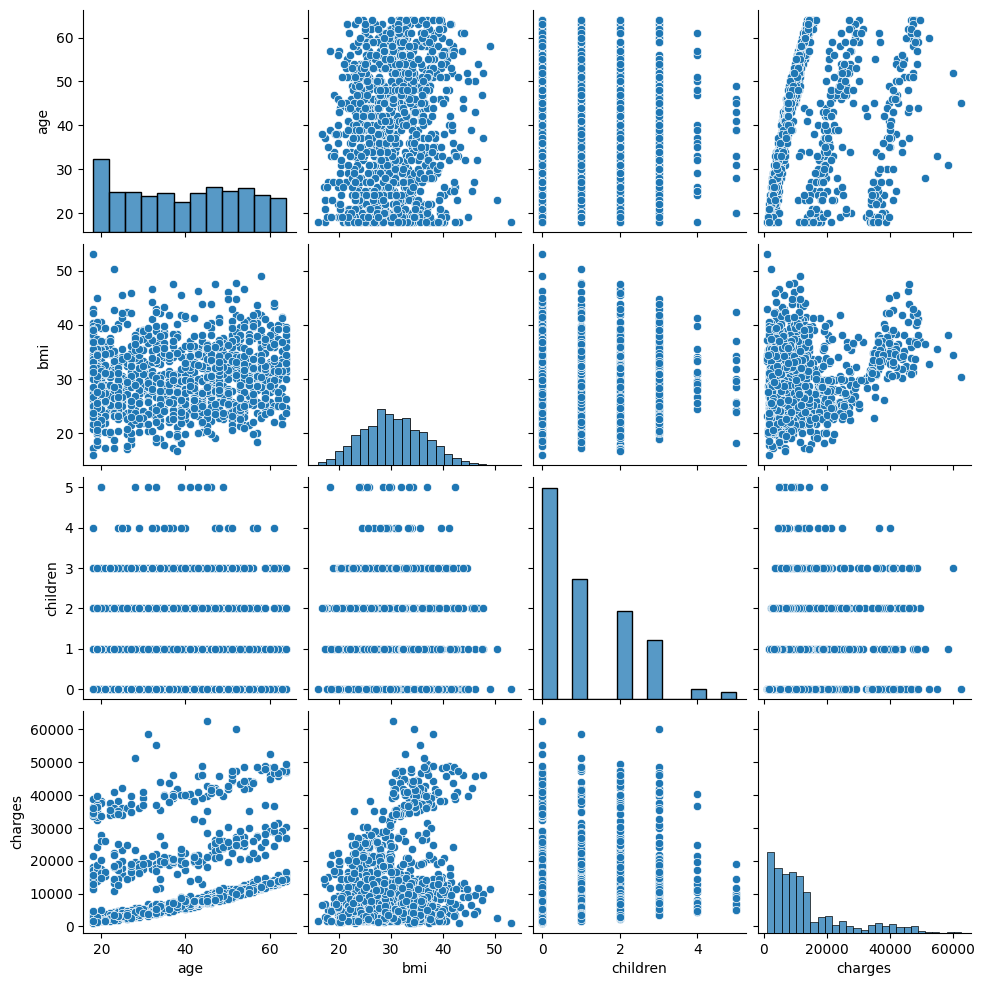

In [27]:
# 산점도

sns.pairplot(train_df)

- charges(치료 비용)과 feature 변수들은 대부분 상관관계가 있는 것으로 보인다.
  - 특히 age(나이)
- children(자녀의 수)는 charges에 뚜렷한 영향을 미친다고 보기엔 어려움

### **(c) Correlation Heatmap**

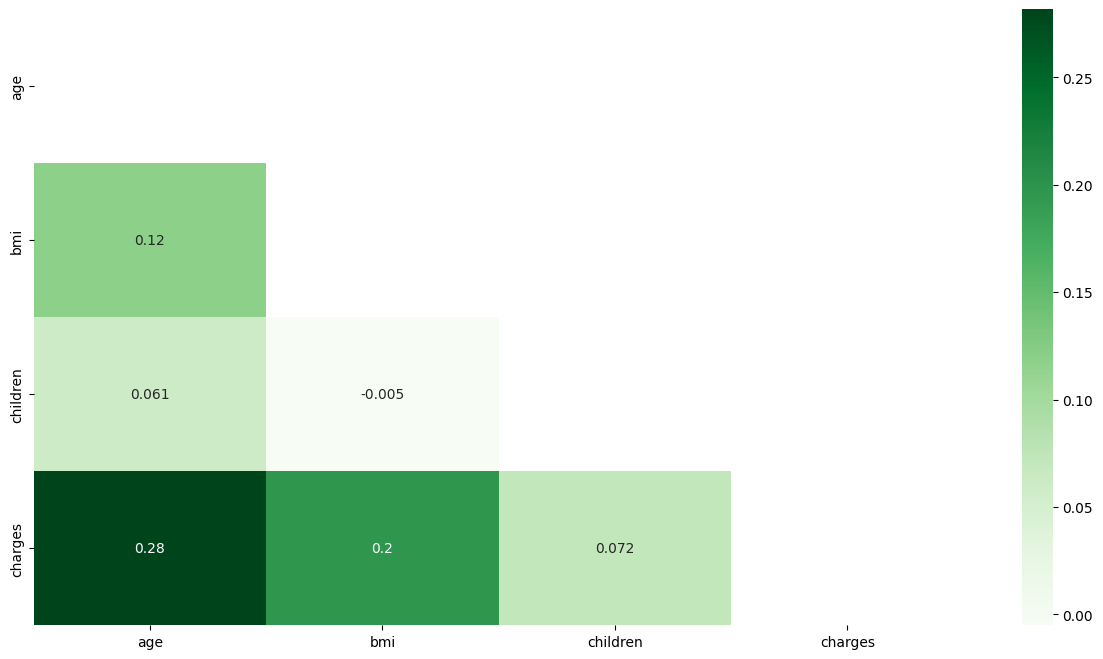

In [28]:
## Correlation Heatmap

# 상관계수
corr = train_df.corr()

# 윗 부분을 마스킹 -> 아래 부분만 나오도록
mask = np.triu(np.ones_like(corr, dtype = bool))

# 히트맵 그리기
plt.figure(figsize = (15, 8))
sns.heatmap(corr, annot=True, cmap = 'Greens', mask=mask)
plt.show()

- 나이는 치료 비용에 꽤 많은 영향을 미침

# **3. 추가적인 데이터 전처리**

## **3-1. 변수 왜곡 확인**
- 왜도(skewness)를 통해 `수치형` 변수들의 왜곡 정도 확인

In [29]:
## 왜도 확인

print(train_df['age'].skew())
print(train_df['bmi'].skew())
print(train_df['children'].skew())

0.027276492267042526
0.2707966258877336
0.9351484685344295


- 나이와 체질량지수의 분포는 거의 정규 분포에 가까움
- 자녀 수의 경우 분포가 왜곡되었음을 확인할 수 있음
  - 치료 비용과 큰 상관관계가 있는 변수는 아니므로 일단은 그냥 넘어감

## **3-2. 데이터 변환**
- 치료 비용(target) 변수는 왜곡된 분포를 지님
  - 로그 변환을 통해 해결

In [30]:
## 로그 변환

train_df['charges'] = np.log1p(train_df['charges'])

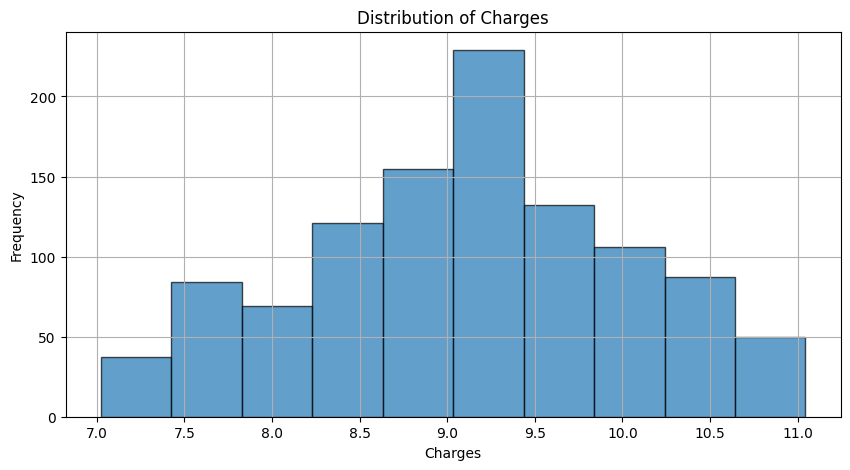

In [31]:
# 분포 재확인

plt.figure(figsize = (10, 5))
plt.hist(train_df['charges'], bins = 10, edgecolor = 'black', alpha=0.7)
plt.xlabel('Charges')
plt.ylabel('Frequency')
plt.title('Distribution of Charges')
plt.grid(True)
plt.show()

- 데이터 분포가 정규 분포에 가까워짐

## **3-3. 데이터 스케일링**
- 데이터 스케일링은 **수치형** 변수에 대해서만 수행
- 표준화(StandardScaler) 활용

In [32]:
from sklearn.preprocessing import StandardScaler

# StandardScaler 객체 생성
scaler = StandardScaler()

# 훈련 데이터 스케일링
numerical_vars = ['age', 'bmi', 'children']
train_df[numerical_vars] = scaler.fit_transform(train_df[numerical_vars])

# 테스트 데이터 스케일링(훈련 데이터의 스케일러를 그대로 사용)
test_df[numerical_vars] = scaler.transform(test_df[numerical_vars])

In [33]:
train_df

,age,sex,bmi,children,smoker,region,charges
560,0.472227,female,-1.756525,0.734336,no,northwest,9.126398
1285,0.543313,female,-1.033082,-0.911192,no,northeast,9.052009
1142,0.898745,female,-0.943687,-0.911192,no,southeast,10.207990
969,-0.025379,female,0.622393,3.202629,no,southeast,9.059265
486,1.040918,female,-1.504893,1.557100,no,northwest,9.431590
...,...,...,...,...,...,...,...
1095,-1.518194,female,0.130717,2.379865,no,northeast,8.425558
1130,-0.025379,female,-1.107579,3.202629,no,southeast,9.057574
1294,1.325264,male,-0.891539,-0.911192,no,northeast,9.386990
860,-0.167551,female,2.820864,0.734336,yes,southwest,10.738883


In [34]:
test_df

,age,sex,bmi,children,smoker,region,charges
764,0.401140,female,-0.891539,0.734336,no,northeast,9095.06825
887,-0.238638,female,-0.089461,-0.911192,no,northwest,5272.17580
890,1.751782,female,-0.608453,-0.911192,yes,northwest,29330.98315
1293,0.472227,male,-0.797177,1.557100,no,northwest,9301.89355
259,-1.447107,male,0.225079,-0.911192,yes,northwest,33750.29180
...,...,...,...,...,...,...,...
109,1.680696,male,0.749865,-0.911192,yes,southeast,47055.53210
575,1.325264,female,-0.561272,-0.911192,no,northwest,12222.89830
535,-0.096465,male,-0.419729,-0.088428,no,northeast,6067.12675
543,1.040918,female,2.789410,-0.911192,yes,southeast,63770.42801


- 제대로 스케일링 된 것을 확인할 수 있음

## **3-4. 범주형 변수 처리**
- 범주형 변수에 대해 One-hot Encoding 진행

In [35]:
train_df = pd.get_dummies(data = train_df, columns = ['sex', 'smoker', 'region'],
                          prefix = ['sex', 'smoker', 'region'])
test_df = pd.get_dummies(data = test_df, columns = ['sex', 'smoker', 'region'],
                          prefix = ['sex', 'smoker', 'region'])

In [36]:
train_df

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
560,0.472227,-1.756525,0.734336,9.126398,1,0,1,0,0,1,0,0
1285,0.543313,-1.033082,-0.911192,9.052009,1,0,1,0,1,0,0,0
1142,0.898745,-0.943687,-0.911192,10.207990,1,0,1,0,0,0,1,0
969,-0.025379,0.622393,3.202629,9.059265,1,0,1,0,0,0,1,0
486,1.040918,-1.504893,1.557100,9.431590,1,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1095,-1.518194,0.130717,2.379865,8.425558,1,0,1,0,1,0,0,0
1130,-0.025379,-1.107579,3.202629,9.057574,1,0,1,0,0,0,1,0
1294,1.325264,-0.891539,-0.911192,9.386990,0,1,1,0,1,0,0,0
860,-0.167551,2.820864,0.734336,10.738883,1,0,0,1,0,0,0,1


In [37]:
test_df

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
764,0.401140,-0.891539,0.734336,9095.06825,1,0,1,0,1,0,0,0
887,-0.238638,-0.089461,-0.911192,5272.17580,1,0,1,0,0,1,0,0
890,1.751782,-0.608453,-0.911192,29330.98315,1,0,0,1,0,1,0,0
1293,0.472227,-0.797177,1.557100,9301.89355,0,1,1,0,0,1,0,0
259,-1.447107,0.225079,-0.911192,33750.29180,0,1,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
109,1.680696,0.749865,-0.911192,47055.53210,0,1,0,1,0,0,1,0
575,1.325264,-0.561272,-0.911192,12222.89830,1,0,1,0,0,1,0,0
535,-0.096465,-0.419729,-0.088428,6067.12675,0,1,1,0,1,0,0,0
543,1.040918,2.789410,-0.911192,63770.42801,1,0,0,1,0,0,1,0


- 제대로 처리된 것을 확인할 수 있음

# 선형회귀

In [53]:
import pandas as pd
from sklearn.model_selection import train_test_split

# train, test 데이터를 특성 (X)과 타겟 (y)으로 나눔
y_train = train_df['charges']
X_train = train_df.drop('charges', axis=1)

y_test = test_df['charges']
X_test = test_df.drop('charges', axis=1)

In [54]:
from sklearn.linear_model import LinearRegression

# Linear Regression 모델을 생성하고 학습
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

LinearRegression()

In [55]:
# 테스트 데이터로 예측을 수행
y_pred = lr_model.predict(X_test)
y_pred = np.expm1(y_pred)

# 예측 결과를 출력
print("테스트 데이터 예측 결과:")
print(y_pred)

테스트 데이터 예측 결과:
[ 9086.97428249  5602.85203142 66088.68459689  9120.53183141
 14074.55781985  5941.36266338  2826.35761405 15104.11550605
  3790.77494406 10520.30011917 22871.3641618   7484.10033674
  4439.34694093 49815.38240987 59797.19626442 44869.93222111
 11540.26554137 42702.39175333  7781.21377595 32200.35978363
  4879.54790208  7709.63477674  2733.98311788  4192.7147594
 11636.23428848 11384.2526559  12782.19801277  5460.5632338
  9921.52312345  2597.28184319  8619.71931227 11786.08556524
  3306.55719105  5249.58730286  3790.54239596  8555.97117946
  3276.05816669  7298.34810431 46297.38823271 26678.33745868
  4562.38402347  3596.72972055 12342.34553657 10745.73485083
  5637.13765684 11342.4300032   4235.81152737  4392.73554572
 41216.67455009  5456.43393735 14205.00167683  2819.17345238
  8229.57340115  2817.7054195  10116.28281723 11001.60006022
  4211.65787545 28965.69227211 11615.85430713 11086.65202449
 13543.35257035  6057.03247609 16425.65881773  7730.10095095
 10372.9312

In [56]:
from sklearn.metrics import mean_squared_error, r2_score

# 평균 제곱 오차 (Mean Squared Error) 계산
mse = mean_squared_error(y_test, y_pred)

# 결정 계수 (R-squared) 계산
r2 = r2_score(y_test, y_pred)

# 결과 출력
print(f"평균 제곱 오차 (MSE): {mse}")
print(f"결정 계수 (R-squared): {r2}")

평균 제곱 오차 (MSE): 61059596.602414995
결정 계수 (R-squared): 0.6066982575915573


# 엘라스틱넷

In [83]:
from sklearn.linear_model import ElasticNet

El_model = ElasticNet(alpha=0.5, l1_ratio=0.5)
El_model.fit(X_train, y_train)

ElasticNet(alpha=0.5)

In [84]:
# 테스트 데이터로 예측을 수행
y_pred = El_model.predict(X_test)
y_pred = np.expm1(y_pred)

# 예측 결과를 출력
print("테스트 데이터 예측 결과:")
print(y_pred)

테스트 데이터 예측 결과:
[ 9725.25360958  8710.36721612 12272.87857476  9845.07831894
  7073.33271152  8499.62637653  7073.33271152 12272.87857476
  7897.50230897 10213.48265723  8093.31576252  9260.36080039
  7994.80963629  9845.07831894 11686.21508444  9966.37923503
 10213.48265723  9966.37923503  9845.07831894  9489.96116916
  7612.62811473  9489.96116916  7073.33271152  7338.02843879
 10339.32221117 10858.37567905 11686.21508444  7801.37919143
  9966.37923503  6987.23956523  9147.65198067 11264.69390867
  7248.71400098  8093.31576252  7706.42587208  9725.25360958
  7248.71400098  9489.96116916 10595.67134215  8710.36721612
  7073.33271152  7338.02843879 11127.59277513 11543.98412655
  8396.17553529 11543.98412655  7248.71400098  7612.62811473
  9489.96116916  8193.03545652 12123.50804516  6987.23956523
  9147.65198067  6987.23956523 11127.59277513 10339.32221117
  8093.31576252  8193.03545652 11403.48408961 10726.2193532
 12123.50804516  8093.31576252 11830.19828773  9374.45816107
 10595.671

In [85]:
from sklearn.metrics import mean_squared_error, r2_score

# 평균 제곱 오차 (Mean Squared Error) 계산
mse = mean_squared_error(y_test, y_pred)

# 결정 계수 (R-squared) 계산
r2 = r2_score(y_test, y_pred)

# 결과 출력
print(f"평균 제곱 오차 (MSE): {mse}")
print(f"결정 계수 (R-squared): {r2}")

평균 제곱 오차 (MSE): 158283613.24290308
결정 계수 (R-squared): -0.019548512390198836


### 엘라스틱넷 하이퍼 파라미터 튜닝

In [87]:
import numpy as np
from sklearn.linear_model import ElasticNet

# alpha와 l1_ratio 후보값 리스트 정의
alpha_values = [0.1, 0.5, 1.0, 2.0]
l1_ratio_values = [0.1, 0.3, 0.5, 0.7, 0.9]

# 모델을 저장할 리스트 정의
models = []

# for 루프를 사용하여 다양한 하이퍼파라미터 조합으로 모델 생성 및 훈련
for alpha in alpha_values:
    for l1_ratio in l1_ratio_values:
        model = ElasticNet(alpha=alpha, l1_ratio=l1_ratio)
        model.fit(X_train, y_train)
        models.append((alpha, l1_ratio, model))  # 모델 및 하이퍼파라미터 저장

# 생성된 모델들을 사용하여 예측 및 평가 수행
for alpha, l1_ratio, model in models:
    y_pred = model.predict(X_test)
    y_pred = np.expm1(y_pred)
    mse = mean_squared_error(y_test, y_pred)
    print(f"alpha={alpha}, l1_ratio={l1_ratio}, MSE={mse}")


alpha=0.1, l1_ratio=0.1, MSE=51352809.44949156
alpha=0.1, l1_ratio=0.3, MSE=55208452.47132707
alpha=0.1, l1_ratio=0.5, MSE=59816314.22681088
alpha=0.1, l1_ratio=0.7, MSE=65253637.125249125
alpha=0.1, l1_ratio=0.9, MSE=70317675.08784248
alpha=0.5, l1_ratio=0.1, MSE=107661568.19269906
alpha=0.5, l1_ratio=0.3, MSE=131559706.72843833
alpha=0.5, l1_ratio=0.5, MSE=158283613.24290308
alpha=0.5, l1_ratio=0.7, MSE=163020318.12525553
alpha=0.5, l1_ratio=0.9, MSE=169269865.66695997
alpha=1.0, l1_ratio=0.1, MSE=138208427.36659423
alpha=1.0, l1_ratio=0.3, MSE=163229982.5376126
alpha=1.0, l1_ratio=0.5, MSE=170399588.85656738
alpha=1.0, l1_ratio=0.7, MSE=170399588.85656738
alpha=1.0, l1_ratio=0.9, MSE=170399588.85656738
alpha=2.0, l1_ratio=0.1, MSE=160258769.55669656
alpha=2.0, l1_ratio=0.3, MSE=170399588.85656738
alpha=2.0, l1_ratio=0.5, MSE=170399588.85656738
alpha=2.0, l1_ratio=0.7, MSE=170399588.85656738
alpha=2.0, l1_ratio=0.9, MSE=170399588.85656738
